
## Background

Bangkok has become one of Southeast Asia’s most visited cities, attracting millions of tourists annually.  
The rapid growth of short-term rental platforms like Airbnb has significantly influenced the city’s hospitality landscape.  
As tourism flourishes, understanding patterns in Airbnb usage is crucial for hosts, investors, policymakers, and platform managers  
to ensure sustainable and profitable participation.

---

## Problem Statement

Despite the platform’s popularity, there is a lack of structured insight into how Airbnb listings in Bangkok perform across neighborhoods,  
price ranges, room types, and host behaviors.  
Without this understanding, stakeholders may struggle with inefficient pricing strategies, overlooked district opportunities,  
and poorly optimized guest experiences.

---

## Key Objective

This analysis aims to provide a data-driven overview of the Airbnb landscape in Bangkok by focusing on:
- Distribution of listings and reviews across neighborhoods.
- Price range preferences of guests.
- Temporal patterns in reviews (seasonality and COVID-19 impact).
- Popularity of different room types.
- Identification of top-performing hosts based on listing volume.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import calendar


## Load Data

In [2]:
df=pd.read_csv('Airbnb Listings Bangkok.csv')
bangkok = r'Bangkok-districts.geojson'
bangkok_loc = [13.7563,100.5018]

df.tail()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


In [3]:
print(f'Amount of rows and columns in this dataset is {df.shape}')
df.info()

Amount of rows and columns in this dataset is (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               158

## Data Cleaning and Data Understanding

### Missing Value

In [4]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

<Axes: >

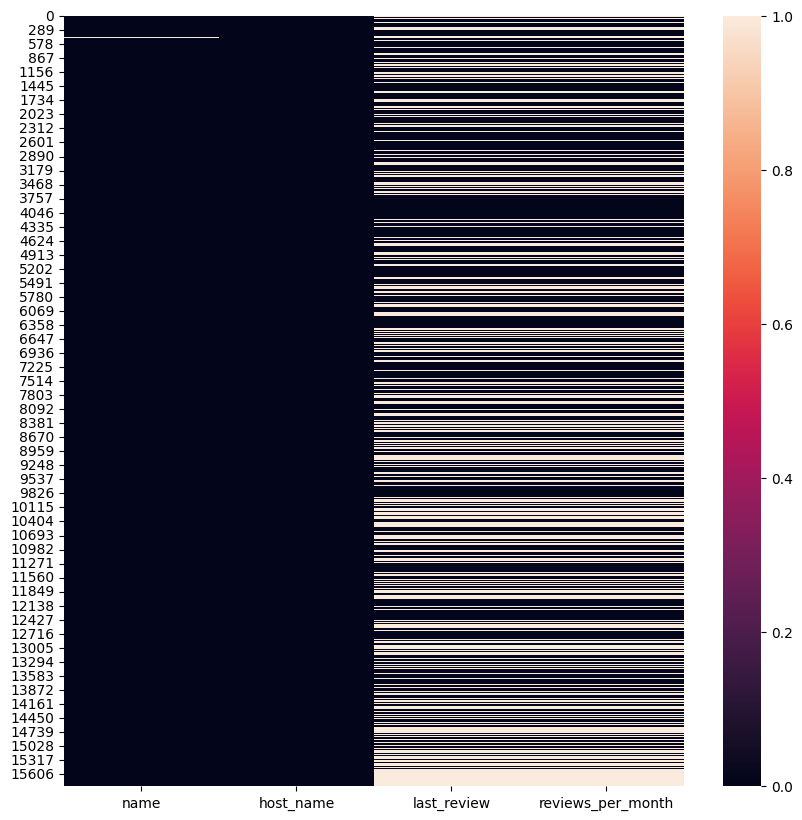

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['name','host_name','last_review','reviews_per_month']].isna())

In [6]:
df[df['name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [7]:
df['name'].fillna('Unknown', inplace= True)
df[df['name'] == 'Unknown']

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,Unknown,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,544,4720818,Unknown,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,572,4245018,Unknown,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,669,6148415,Unknown,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,1030,8055144,Unknown,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,1282,10000742,Unknown,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,1594,10710165,Unknown,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,2075,13142743,Unknown,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [8]:
df[df['host_name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [9]:
df['host_name'].fillna('Unknown', inplace=True)
df[df['host_name'] == 'Unknown']

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,3571,19682464,Cozy Hideaway,137488762,Unknown,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [10]:
df[df['last_review'].isna()].tail()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


In [11]:
df['last_review'].fillna('-', inplace=True)
df[df['last_review'] == '-'].tail()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,-,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,-,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,-,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,-,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,-,NaN,14,365,0


In [12]:
df['last_review_datetime'] = pd.to_datetime(df['last_review'].replace('-', pd.NaT), errors='coerce')

In [13]:
df[df['reviews_per_month'].isna()].tail()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review_datetime
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,-,NaN,1,362,0,NaT
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,-,NaN,14,365,0,NaT
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,-,NaN,14,365,0,NaT
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,-,NaN,14,365,0,NaT
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,-,NaN,14,365,0,NaT


In [14]:
df['reviews_per_month'].fillna(0, inplace=True)
df[df['reviews_per_month']== 0].tail()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review_datetime
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,-,0.0,1,362,0,NaT
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,-,0.0,14,365,0,NaT
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,-,0.0,14,365,0,NaT
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,-,0.0,14,365,0,NaT
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,-,0.0,14,365,0,NaT


### Unnecessary Columns

In [15]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.tail()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review_datetime
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,-,0.0,1,362,0,NaT
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,-,0.0,14,365,0,NaT
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,-,0.0,14,365,0,NaT
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,-,0.0,14,365,0,NaT
15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,-,0.0,14,365,0,NaT


### New Columns

In [16]:
max_price = df['price'].max()


bins = list(range(0, int(np.ceil(max_price / 1000) * 1000) + 1000, 1000))


labels = [f'{bins[i]} - {bins[i+1]}' for i in range(len(bins)-1)]


df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

### Outliers

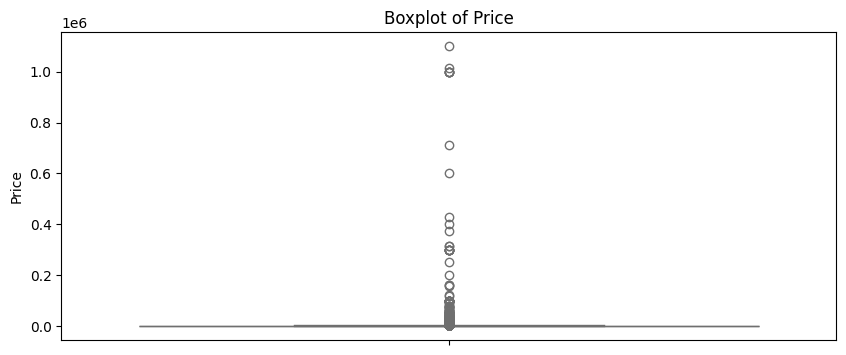

In [17]:
plt.figure(figsize=(10, 4))
sns.boxplot(y=df['price'], color='skyblue')
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.show()

In [18]:
df[df['price'] > 10000]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review_datetime,price_range
17,66046,"24Flr- 1br Apt near JJ, MRT, BTS",323158,Sue,Chatu Chak,13.822980,100.564840,Entire home/apt,122594,2,9,2020-03-04,0.09,6,180,0,2020-03-04,122000 - 123000
275,1547429,บ้านใกล้สุวรรณภูมิ ตรงข้ามแอร์พอร์ตลิ้งบ้านทับ...,8243802,Prare,Saphan Sung,13.736670,100.691410,Entire home/apt,10355,1,0,-,0.00,1,365,0,NaT,10000 - 11000
393,4450156,"Stylish Apartment in Bangkok, MRT",23095883,Thanakrit,Huai Khwang,13.755950,100.567800,Entire home/apt,100000,365,0,-,0.00,1,365,0,NaT,100000 - 101000
420,4526250,Luxury Apt Heart of Bkk Sukh soi 10,23464259,Jean-Michel,Khlong Toei,13.721380,100.582360,Entire home/apt,15000,1,1,2014-11-20,0.01,1,365,0,2014-11-20,15000 - 16000
484,3480807,Benviar - Three Bedroom Suite(225 Sqm) @Chitlom,17499526,Benjamin,Parthum Wan,13.740340,100.545550,Entire home/apt,17265,1,344,2022-12-27,3.38,7,351,59,2022-12-27,17000 - 18000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15690,790714578921259876,Pool Villa 107B,351309638,Smirah,Bang Na,13.652708,100.626089,Entire home/apt,17000,1,0,-,0.00,5,361,0,NaT,17000 - 18000
15693,790816217344482012,Astounding view on river bank,83677585,Nina,Bang Rak,13.721984,100.516085,Entire home/apt,12000,1,0,-,0.00,1,3,0,NaT,12000 - 13000
15721,785892679369172786,Modern 2 Bedrooms Suite,434168399,Krittika,Vadhana,13.735210,100.598480,Entire home/apt,11429,1,0,-,0.00,44,365,0,NaT,11000 - 12000
15756,786741911434733026,Private Home for 12-16 Guests 8 Parking,435016000,Tadchon,Lat Phrao,13.827958,100.591895,Entire home/apt,17900,2,0,-,0.00,10,362,0,NaT,17000 - 18000


In [19]:

df = df[df['price'] <= 10000]

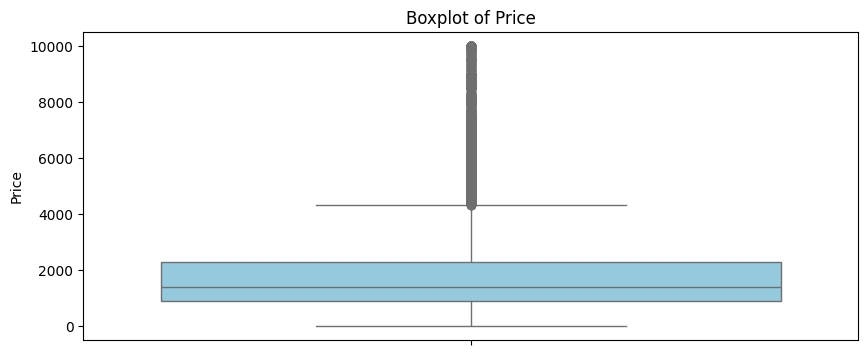

In [20]:
plt.figure(figsize=(10, 4))
sns.boxplot(y=df['price'], color='skyblue')
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.show()

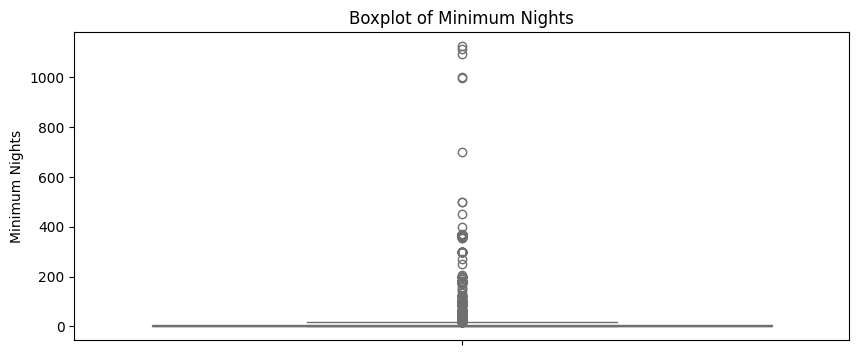

In [21]:
plt.figure(figsize=(10, 4))
sns.boxplot(y=df['minimum_nights'], color='skyblue')
plt.title('Boxplot of Minimum Nights')
plt.ylabel('Minimum Nights')
plt.show()

In [22]:
df[df['minimum_nights'] > 731]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review_datetime,price_range
61,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.74814,100.52016,Entire home/apt,2900,1125,295,2021-08-21,2.61,3,0,0,2021-08-21,2000 - 3000
7986,35165443,Wonderful apartment for you holiday in Thai,86991723,Yang,Bang Na,13.67260,100.60352,Entire home/apt,2000,1115,0,-,0.00,2,358,0,NaT,2000 - 3000
10153,41623113,blossom condo舒适双床房摩天轮夜市周边免费泳池健身房@Sathon surasa...,162537040,Songnya,Sathon,13.71195,100.52055,Entire home/apt,650,1000,2,2020-03-08,0.06,13,179,0,2020-03-08,0 - 1000
11243,45051929,Bellevue Boutique Bangkok | Airport Link HUA-MAK,165329146,Sataporn,Suanluang,13.73633,100.63836,Private room,1314,999,0,-,0.00,2,181,0,NaT,1000 - 2000
11524,49032568,Freehold Condo near Bangsue Grand Station,4661237,Chayanid,Bang Sue,13.80697,100.52362,Entire home/apt,554,1095,0,-,0.00,1,358,0,NaT,0 - 1000


In [23]:
df = df[df['minimum_nights'] <= 731]

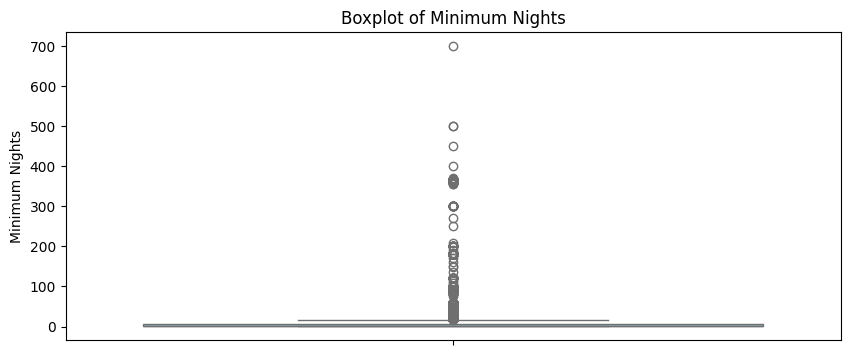

In [24]:
plt.figure(figsize=(10, 4))
sns.boxplot(y=df['minimum_nights'], color='skyblue')
plt.title('Boxplot of Minimum Nights')
plt.ylabel('Minimum Nights')
plt.show()

### Data Anomalies

In [25]:
df[df['price'] == df['price'].min()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review_datetime,price_range
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,-,0.0,1,0,0,NaT,0 - 1000


In [26]:
df = df[df['price'] != 0]

### Duplicated Data

In [27]:
df.duplicated().value_counts()

False    15473
Name: count, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15473 entries, 0 to 15853
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15473 non-null  int64         
 1   name                            15473 non-null  object        
 2   host_id                         15473 non-null  int64         
 3   host_name                       15473 non-null  object        
 4   neighbourhood                   15473 non-null  object        
 5   latitude                        15473 non-null  float64       
 6   longitude                       15473 non-null  float64       
 7   room_type                       15473 non-null  object        
 8   price                           15473 non-null  int64         
 9   minimum_nights                  15473 non-null  int64         
 10  number_of_reviews               15473 non-null  int64         
 11  last_re

In [29]:
df.to_csv('airbnb_bangkok_cleaned.csv', index=False)

### Data Distribution

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>,
        <Axes: title={'center': 'last_review_datetime'}>]], dtype=object)

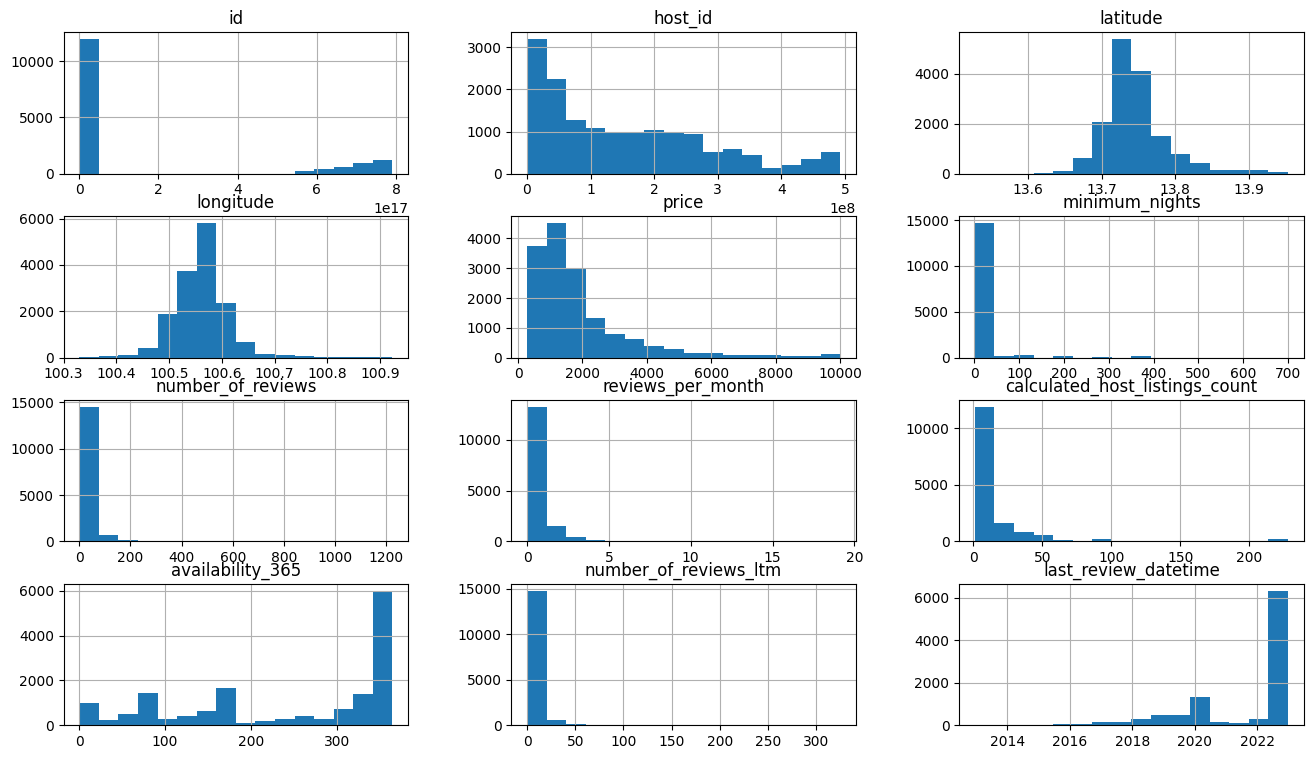

In [30]:
df.hist(bins=16, figsize=(16,9))

## Data Analysis

### 1. Distribution of Listing by Neighbourhood

In [31]:
distrik = pd.DataFrame(data=df.groupby('neighbourhood').count()['id']).reset_index()
distrik.columns = ['neighbourhood', 'total_listing']


distrik = df.groupby('neighbourhood')['id'].count().reset_index()
distrik.columns = ['neighbourhood', 'total_listing']


fig = px.choropleth_mapbox(
    distrik,
    geojson=bangkok,
    locations='neighbourhood',
    color='total_listing',
    featureidkey='properties.dname_e',
    center={'lat': 13.7563, 'lon': 100.5018},
    mapbox_style='carto-positron',
    zoom=9,
    labels={
        'total_listing': 'Number of Listings in Airbnb',
        'neighbourhood': 'District'
    },
    color_continuous_scale=['#ffe0ec', '#f9b3d1', '#f47fb7', '#ec4b9e', '#d91377']
)

fig.update_layout(margin={'r':0, 't':0, 'l':0, 'b':0})
fig.show()

/var/folders/k5/btcb7n5557sf9xy2f7wdrcnr0000gn/T/ipykernel_11070/533812067.py:9: DeprecationWarning: *choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.choropleth_mapbox(


In [32]:
# Calculate total listings and total reviews per district
distrik_review = df.groupby('neighbourhood').agg(
    total_listing=('id', 'count'),
    total_review=('number_of_reviews', 'sum')
).reset_index()

# Calculate reviews per listing
distrik_review['review_per_listing'] = distrik_review['total_review'] / distrik_review['total_listing']

# Plot Top 10 districts by reviews per listing with pink color scale
fig = px.bar(
    distrik_review.sort_values(by='review_per_listing', ascending=False).head(10),
    x='neighbourhood',
    y='review_per_listing',
    title='Top 10 Districts with Highest Reviews per Listing',
    labels={
        'neighbourhood': 'District',
        'review_per_listing': 'Reviews per Listing'
    },
    color='review_per_listing',
    color_continuous_scale=['#ffe0ec', '#f9b3d1', '#f47fb7', '#ec4b9e', '#d91377']  # pink gradient
)

fig.update_layout(
    xaxis_tickangle=-45,
    plot_bgcolor='white',
    title_font_size=20
)

fig.show()

#### Key Insights

1. **Listings are Highly Concentrated in Central Districts**  
   Districts like **Watthana**, **Khlong Toei**, and **Ratchathewi** have the highest number of Airbnb listings, driven by tourist demand and accessibility.

2. **Outer Districts Have Untapped Potential**  
   Many outer districts have very few listings despite having infrastructure, showing opportunities for market expansion.

3. **Some Districts Show High Guest Engagement**  
   Districts such as **Pom Prap Sattru Phai**, **Phaya Thai**, and **Sathon** have the highest number of **reviews per listing**, suggesting **high guest satisfaction or occupancy rates**, despite not being the top in total listings.

---

#### Recommendations

1. **Promote Alternative Districts to Reduce Central Overload**  
   Encourage growth in mid-tier districts like **Huai Khwang** or **Phaya Thai** to ease pressure on central areas.

2. **Provide Incentives in Underrepresented Areas**  
   Support new hosts in low-listing districts with **marketing help, fee discounts, or local collaborations** to increase listing diversity across Bangkok.

3. **Leverage High-Review Districts for Quality Listings**  
   Focus on promoting listings in high-review districts like **Pom Prap Sattru Phai** and **Phaya Thai** as **premium or high-trust options**, and analyze their practices to replicate success in other areas.

### 2. Ideal Price Range Based on Number of Reviews

In [33]:
# Determine the maximum price
max_price = df['price'].max()

# Create bins with 1000 Baht increments up to the max price (+1000 to ensure all values are included)
bins = list(range(0, int(np.ceil(max_price / 1000) * 1000) + 1000, 1000))

# Define labels for each price range
labels = [f'{bins[i]} - {bins[i+1]}' for i in range(len(bins) - 1)]

# Bin the prices into defined ranges
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Group and sum total reviews per price range
grouped = df.groupby('price_range', observed=True)['number_of_reviews'].sum().reset_index()

# Plot using Plotly with a pink color palette
fig = px.bar(
    grouped,
    x='price_range',
    y='number_of_reviews',
    title='Total Number of Reviews by Price Range (per 1000 Baht)',
    labels={
        'price_range': 'Price Range (Baht)',
        'number_of_reviews': 'Total Reviews'
    },
    text_auto=True,
    color_discrete_sequence=['#FFC0CB']  # Light pink
)

fig.update_layout(
    xaxis_tickangle=-45,
    plot_bgcolor='white',
    title_font_size=20
)

fig.show()

#### Insight
1.	High Review Volume in Lower Price Ranges
Listings priced between 0–2000 Baht dominate in review counts, indicating that budget to mid-range accommodations are the most popular among users.
2.	Very Low Engagement in High-End Listings (>5000 Baht)
Listings priced above 5000 Baht received very few reviews, suggesting limited demand or low booking frequency in the premium segment.

---

#### Recommendation
1.	Focus on Competitive Mid-Range Listings
Optimize and promote listings in the 1000–2000 Baht range, which shows the highest customer interest. Enhancing quality and value here can lead to higher occupancy and better reviews.
2.	Improve Premium Listings’ Appeal
For high-priced listings, highlight exclusive amenities (e.g., private pools, scenic views) and consider dynamic pricing or promotional offers to increase attractiveness and booking rates.

In [34]:
df[['price', 'number_of_reviews']].corr(method='spearman')

,price,number_of_reviews
price,1.000000,-0.007376
number_of_reviews,-0.007376,1.000000


In [35]:
from scipy.stats import spearmanr
spearmanr(df['price'], df['number_of_reviews'])

SignificanceResult(statistic=-0.007376303204286715, pvalue=0.35889090616692565)

#### Interpretation (Spearman Correlation)
1.	Very Weak Negative Correlation
The Spearman correlation coefficient is -0.0074, indicating almost no monotonic relationship between price and number of reviews. In other words, changes in price are not associated with consistent increases or decreases in the number of reviews.
2.	Statistically Not Significant
The p-value is 0.3589 (> 0.05), suggesting that the correlation is not statistically significant. We fail to reject the null hypothesis, meaning there is no meaningful monotonic correlation between price and number of reviews in this dataset.


### 3. Monthly Review Counts by Year

In [36]:
# Ensure the date column is in datetime format
df['last_review_datetime'] = pd.to_datetime(df['last_review_datetime'], errors='coerce')

# Filter years starting from 2015
df = df[df['last_review_datetime'].dt.year >= 2015]

# Get the list of unique years
years = sorted(df['last_review_datetime'].dt.year.dropna().unique())

# Set number of subplot columns and calculate rows
n_cols = 4
n_rows = -(-len(years) // n_cols)  # Ceiling division

# Initialize subplot figure
fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    subplot_titles=[f"Year {year}" for year in years],
    horizontal_spacing=0.05,
    vertical_spacing=0.1
)

# Abbreviated month names (Jan, Feb, ..., Dec)
month_names = [calendar.month_abbr[m] for m in range(1, 13)]

# Loop through each year and add a line chart to the subplot
for i, year in enumerate(years):
    df_year = df[df['last_review_datetime'].dt.year == year]
    
    # Count number of reviews per month
    monthly_counts = df_year['last_review_datetime'].dt.month.value_counts().sort_index()
    
    # Ensure all months are present (fill missing with 0)
    monthly_counts = monthly_counts.reindex(range(1, 13), fill_value=0)

    # Determine row and column for the subplot
    row = (i // n_cols) + 1
    col = (i % n_cols) + 1

    # Add trace (line + markers) to the subplot
    fig.add_trace(
        go.Scatter(
            x=month_names,
            y=monthly_counts.values,
            mode='lines+markers',
            line=dict(width=2, color='pink'),
            marker=dict(size=6),
            showlegend=False
        ),
        row=row,
        col=col
    )

# Update overall layout of the figure
fig.update_layout(
    height=300 * n_rows,
    width=1200,
    title_text="Monthly Review Counts by Year (2015 -2022)",
    title_font=dict(size=20),
    template="plotly_white",
    margin=dict(t=80),
)

# Improve readability of subplot titles and axis labels
fig.update_annotations(font=dict(size=13))
fig.update_xaxes(tickangle=45)

# Display the plot
fig.show()

#### Insights
1.	Consistent Increase in Reviews Toward Year-End
In almost every year, there is a clear pattern of increasing review counts in November and December. This trend is likely tied to:
-	Holiday seasons such as Christmas and New Year.
-	Peak travel periods, especially in tourist destinations, leading to more bookings and thus more reviews.
-	This trend becomes especially obvious in high-activity years like 2019 and 2022.
2.	Sharp Decline in 2020 Due to COVID-19 Pandemic
-	In 2020, reviews dramatically dropped starting March, aligning with global travel restrictions, lockdowns, and reduced tourism activity during the COVID-19 pandemic.
-	The first three months were relatively high, but from April onward, activity remained flat and low — consistent with halted operations across the hospitality sector.

---

#### Recommendations
1.	Leverage Year-End Demand
-	Optimize listing visibility and promotions between October to December.
-	Encourage guests to leave reviews during this peak period to boost credibility for the following year.
-	Consider adding special seasonal offerings or discounts to attract more bookings.
2.	Crisis Preparedness for Future Disruptions
-	Use the 2020 drop as a case study to build resilience strategies, such as:
-	Diversifying target customer segments (e.g., domestic vs. international tourists).
-	Improving flexibility (cancellation/refund policies) during global disruptions.
-	Enhancing long-stay or work-from-anywhere features, which became popular during the pandemic.
3.	Target Growth Based on Historical Patterns
-	Allocate advertising and marketing spend to align with historical spikes (especially Q4).
-	Plan resource allocation (cleaning, customer support, check-in logistics) to handle increased end-of-year demand.

### 4. Total Number of Reviews by Room Type

/var/folders/k5/btcb7n5557sf9xy2f7wdrcnr0000gn/T/ipykernel_11070/2721847139.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




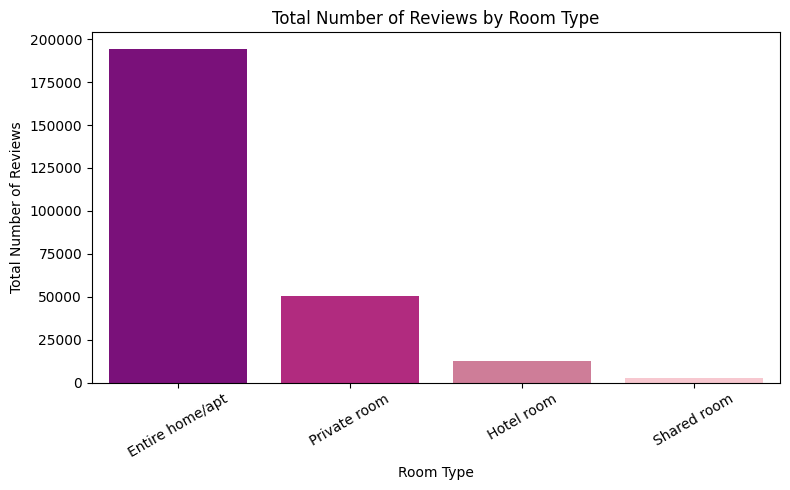

In [37]:
# Aggregate total number_of_reviews per room_type
room_reviews = df.groupby('room_type')['number_of_reviews'].sum().reset_index()

# Sort descending by number of reviews
room_reviews = room_reviews.sort_values(by='number_of_reviews', ascending=False)

# Define pink color gradient (dark pink to light pink)
pink_palette = sns.color_palette(["#8B008B", "#C71585", "#DB7093", "#FFC0CB"])  # kamu bisa sesuaikan jumlah warna

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=room_reviews, x='room_type', y='number_of_reviews', palette=pink_palette)

plt.title('Total Number of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#### **Insights**

1. **Dominance of “Entire home/apt”**  
   The *Entire home/apt* room type received the **highest number of reviews by far**, totaling nearly **200,000 reviews**. This indicates a strong guest preference for private, fully rented accommodations.

2. **“Private room” comes second, but far behind**  
   While *Private room* is the second most reviewed category, it only accounts for about **25% of the reviews** compared to *Entire home/apt*, highlighting a significant demand gap.

3. **Low engagement with “Hotel room” and “Shared room”**  
   Both types received **very few reviews**, suggesting they are either **less available or less popular** among guests.

---

#### **Recommendations**

1. **Prioritize “Entire home/apt” listings**  
   If you are a host or investor, focusing on *Entire home/apt* listings is highly recommended, as it is clearly the **most preferred option** by guests — likely due to privacy and comfort.

2. **Optimize “Private room” offerings**  
   Consider improving *Private room* listings by **revising pricing, enhancing amenities, and improving descriptions**. These could appeal more to solo travelers or budget-conscious guests.

3. **Re-evaluate “Hotel room” and “Shared room” strategies**  
   If you have listings under these categories, you might want to **reposition, promote, or even convert them** to a more popular type due to their low performance.

4. **Leverage review text analysis**  
   For *Entire home/apt* listings, perform **text analysis on reviews** to discover what features guests love the most — this can guide enhancements for other room types.


### 5. Top Host with most `Calculated_Listing_Host`

/var/folders/k5/btcb7n5557sf9xy2f7wdrcnr0000gn/T/ipykernel_11070/736643600.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




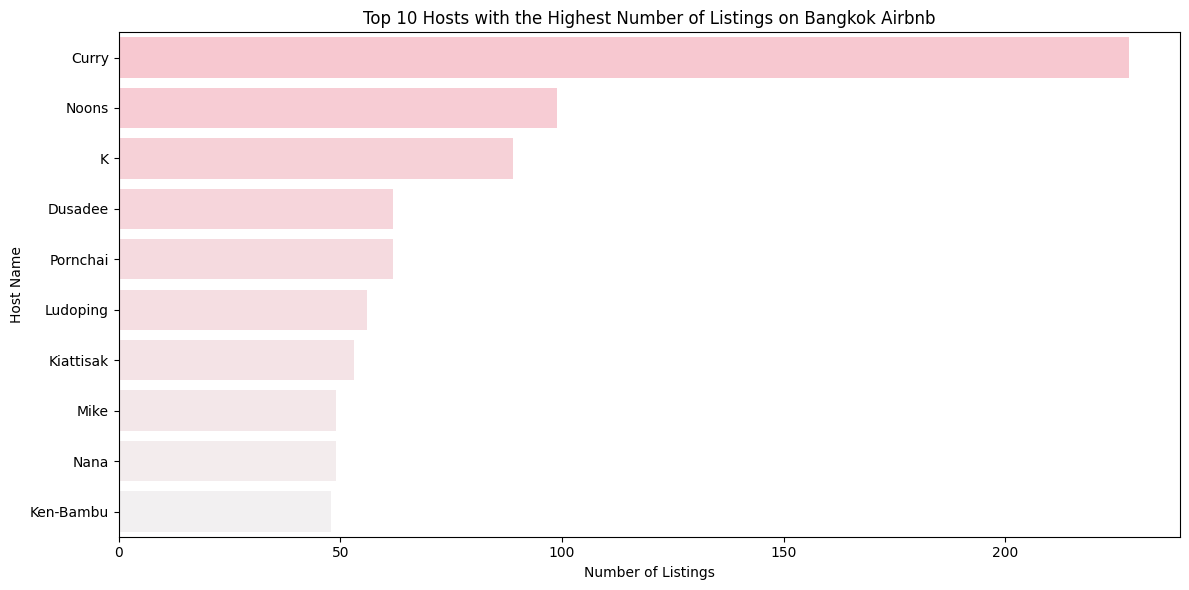

In [38]:
# Get top 10 hosts with the most listings
top_hosts = (
    df.groupby(['host_id', 'host_name'])['calculated_host_listings_count']
    .max()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Define pink color palette (dark to light)
pink_palette = sns.light_palette("pink", n_colors=10, reverse=True)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_hosts, x='calculated_host_listings_count', y='host_name', palette=pink_palette)
plt.title('Top 10 Hosts with the Highest Number of Listings on Bangkok Airbnb')
plt.xlabel('Number of Listings')
plt.ylabel('Host Name')
plt.tight_layout()
plt.show()

#### Insights

- Such hosts are likely operating as **professional property managers or agencies** rather than individuals.
- This centralization could have implications on pricing, availability, and user experience in the platform.

---

#### Recommendations
1. **Monitor Superhosts**: Platforms like Airbnb should **closely monitor** high-volume hosts for quality and compliance with local regulations.
2. **Engage Top Hosts**: Consider creating a **partnership or loyalty program** to retain high-performing hosts such as Curry, Noons, and K.
3. **Diversify Host Base**: Encourage new and smaller hosts to join by providing onboarding support and incentives to **reduce host dependency concentration**.
4. **Regulatory Considerations**: Local authorities may want to evaluate whether the presence of high-volume hosts affects the housing market and **enforce fair hosting practices**.
5. **Improve Listing Quality**: Analyze reviews and performance metrics from these top hosts to **identify best practices** that can be shared with others.


## Conclusion

#### Key Insights

- **Central districts dominate** in listing counts, but outer districts show growth potential.
- **Reviews peak toward the year-end**, especially in November–December, driven by tourism seasons.
- **Budget to mid-range prices (0–2000 Baht)** attract the most guest engagement.
- **Entire home/apt** listings are vastly preferred over other room types.
- A small number of **professional hosts** manage a large share of listings, indicating market centralization.

---

#### Recommendations

1. **Expand Beyond Central Districts**  
   Encourage listing growth in underserved but accessible areas to reduce competition and expand guest options.

2. **Capitalize on Seasonal Peaks**  
   Promote listings more heavily between October–December with tailored offers to maximize visibility and bookings.

3. **Strengthen Mid-Range Offerings**  
   Improve amenities, descriptions, and pricing strategies for listings in the 1000–2000 Baht range.

4. **Prioritize Entire Home Listings**  
   Invest more in entire apartments/homes, as guests clearly favor privacy and autonomy.

5. **Monitor and Engage Superhosts**  
   Work closely with high-volume hosts to maintain platform quality, ensure regulatory compliance,  
   and gather best practices to support new hosts.

6. **Prepare for Market Disruptions**  
   Build adaptive strategies for listings to cope with external events like pandemics through long-stay options, flexible bookings,  
   and localized marketing.
